### Por que a superfície de erro de atributos uniformemente distribuídos no intervalo de 0 a 1 não é circular?

Vamos considerar as seguintes funções objetivo $y = x_1 + x_2$ e hipótese $\hat{y} = \hat{a}_1 x_1 + \hat{a}_2 x_2$. Não vamos considerar a adição de ruído, portanto, a função observável é a própria função objetivo.

A equação do erro quadrático médio usando as definições acima é dada por

$$J_{e}(\textbf{a}) = \frac{1}{N} \sum_{i=0}^{N-1}{[(x_1[i] + x_2[i]) - (\hat{a}_1 x_1[i] + \hat{a}_2 x_2[i])]}^2,$$

a qual pode ser reescrita da seguinte forma

$$J_{e}(\textbf{a}) = (1 - \hat{a}_1)^2 \frac{1}{N} \sum_{i=0}^{N-1}{x_1^2[i]} + (1 - \hat{a}_1) (1 - \hat{a}_2)\frac{1}{N} \sum_{i=0}^{N-1}{x_1[i]x_2[i]} + (1 - \hat{a}_2)^2 \frac{1}{N} \sum_{i=0}^{N-1}{x_2^2[i]}.$$

As três médias na equação acima podem ser aproximadas como sendo as esperanças das variáveis $x_1$ e $x_2$, assim, a equação acima pode ser reescrita como

$$J_{e}(\textbf{a}) = (1 - \hat{a}_1)^2 \mathbb{E}[x_1^2[i]] + (1 - \hat{a}_1) (1 - \hat{a}_2) \mathbb{E}[x_1[i]] \mathbb{E}[x_2[i]] + (1 - \hat{a}_2)^2 \mathbb{E}[x_2^2[i]],$$

onde $\mathbb{E}[x_1[i]x_2[i]] = \mathbb{E}[x_1[i]] \mathbb{E}[x_2[i]]$, pois as variáveis são independentes.

Como a média de variáveis uniformemente distribuídas é diferente de zero, a equação acima se torna a equação de uma elipse, tendo como variáveis os pesos $\hat{a}_1$ e $\hat{a}_2$.

Se as variáveis seguissem a distribuição Gaussiana normal padrão, suas médias teria o valor igual a zero e, consequentemente, a equação acima seria a equação de um círculo.

No exemplo abaixo, se as variáveis com distibuição uniforme tiverem média igual a zero, teremos também uma equação de erro com formato circular.

Em resumo, o que faz com que a superfície não seja circular é a média dos atributos.

In [1]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
N = 10000

x1 = np.random.rand(N,1)
x2 = np.random.rand(N,1)

y = x1 + x2

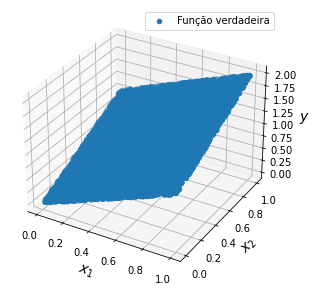

In [4]:
# Plot observable function.
fig = plt.figure(figsize=(5,5))
plt.subplot(projection='3d')
ax = fig.gca()
ax.scatter(x1,x2,y, label='Função verdadeira')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)
plt.legend()
plt.show()

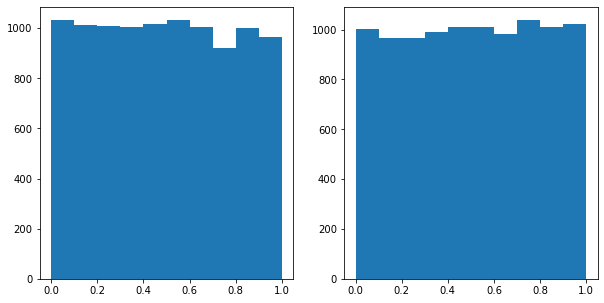

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x1, bins=10)

plt.subplot(1,2,2)
plt.hist(x2, bins=10)

plt.show()

In [6]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = X.dot(a_opt)
Joptimum = (1.0/N)*np.sum(np.power((y - yhat), 2))

print(a_opt)
print(Joptimum)

[[1.]
 [1.]]
1.4956650397857659e-30


In [7]:
# Generate values for parameters.
M = 200
a1 = np.linspace(-100.0, 100.0, M)
a2 = np.linspace(-100.0, 100.0, M)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A1[iter1,iter2]*x1 + A2[iter1,iter2]*x2
        J[iter1,iter2] = (1.0/N)*np.sum(np.square(y - yhat))

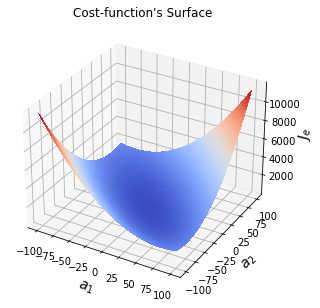

In [8]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,5))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
#Show the plot.
plt.show()

In [9]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.001
# Maximum number of iterations.
n_iterations = 1000

# Random initialization of parameters.
a = np.array([-100, -100]).reshape(2, 1)

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[:, 0] = a.reshape(2,)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))
while iteration < n_iterations and error > 1e-3:
    gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
    grad_hist[:, iteration] = gradients.reshape(2,)
    a = a - alpha * gradients
    a_hist[:, iteration+1] = a.reshape(2,)
    Jgd[iteration+1] = (1.0/M)*sum(np.power((y - X.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

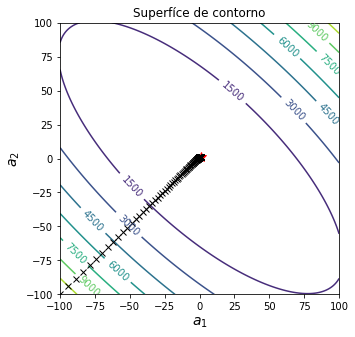

In [10]:
fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], 'r*', markersize=10)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Superfíce de contorno')

plt.show()

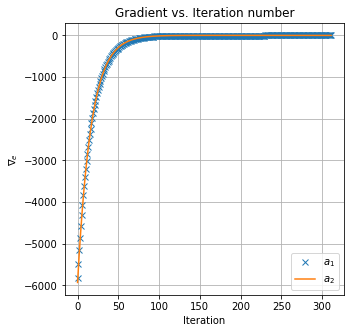

In [11]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), grad_hist[0, 0:iteration], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1, 0:iteration], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.grid()
plt.show()

In [12]:

a1 = 0.5

a2 = 0.5

e1 = np.zeros((N,))
e2 = np.zeros((N,))
e3 = np.zeros((N,))
for i in range(N):
    e1[i] = ((1-a1)**2)*(x1[i]**2)
    e2[i] = 2*(1-a1)*(1-a2)*x1[i]*x2[i] 
    e3[i] = ((1-a2)**2)*(x2[i]**2)

In [13]:
print(np.mean(e1))
print(np.mean(e2))
print(np.mean(e3))

0.08172912125692698
0.12444590698813231
0.08455834109473305
